# This notebook goes through the process of conducting a multiple linear regression to get information about aging populations in US CBSAs.

###### Imports

In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.font_manager
from sklearn.linear_model import LinearRegression

First I want to think through what I need to predict. In this case, let's think through what becomes relevant when we're thinking about services for and policies related to the elderly...

Maybe we want to predict population density of the elderly because this will have some bearing on the types of transportation services an area needs to be prepared to provide. Maybe we want to predict total share of population because if that share grows there may be a greater burden on the tax base - those who are still working, and that's something that a government needs to be prepared for.

First let's bring in the data

In [4]:
data = pd.read_csv('../output/csv/decadeCBSAs.csv')
data.head()

,NAME,CBSA,GEOID,year,geoyearID,total,child,taxbase,O65,Pchild,Ptaxbase,PO65,homevalue,State,MetroMicro,CBSAFIPS,popdensity,O65popdensity,tbpopdensity,childpopdensity
0,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",310M100US12020,2010,310M100US120202010,192738,40837,132080,19821,21.2,68.5,10.3,160200,GA,Metro,12020,188.047757,19.338660,128.865858,39.843239
1,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",310M100US12020,2011,310M100US120202011,193317,39216,133321,20780,20.3,69.0,10.7,163600,GA,Metro,12020,188.612667,20.274323,130.076658,38.261686
2,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",310M100US12020,2012,310M100US120202012,194337,39979,131774,22584,20.6,67.8,11.6,159500,GA,Metro,12020,189.607845,22.034423,128.567304,39.006118
3,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",310M200US12020,2013,310M200US120202013,197357,39358,135387,22612,19.9,68.6,11.5,154500,GA,Metro,12020,192.554354,22.061741,132.092383,38.400230
4,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",310M200US12020,2014,310M200US120202014,197268,39567,134509,23192,20.1,68.2,11.8,153200,GA,Metro,12020,192.467520,22.627627,131.235748,38.604144


Let's create some scatterplots looking at relationships between these variables, year agnostic.

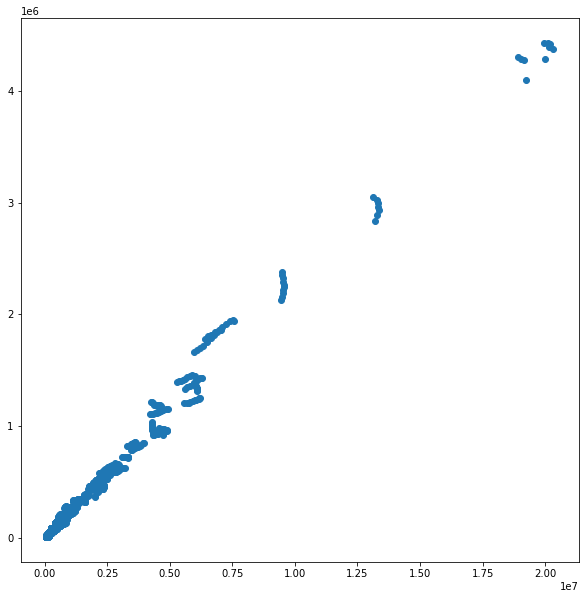

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(data['total'], data['child'])

In [25]:
plt.rcParams['figure.constrained_layout.use'] = True

Text(0.5, 1.0, 'Child and Elderly Population Density')

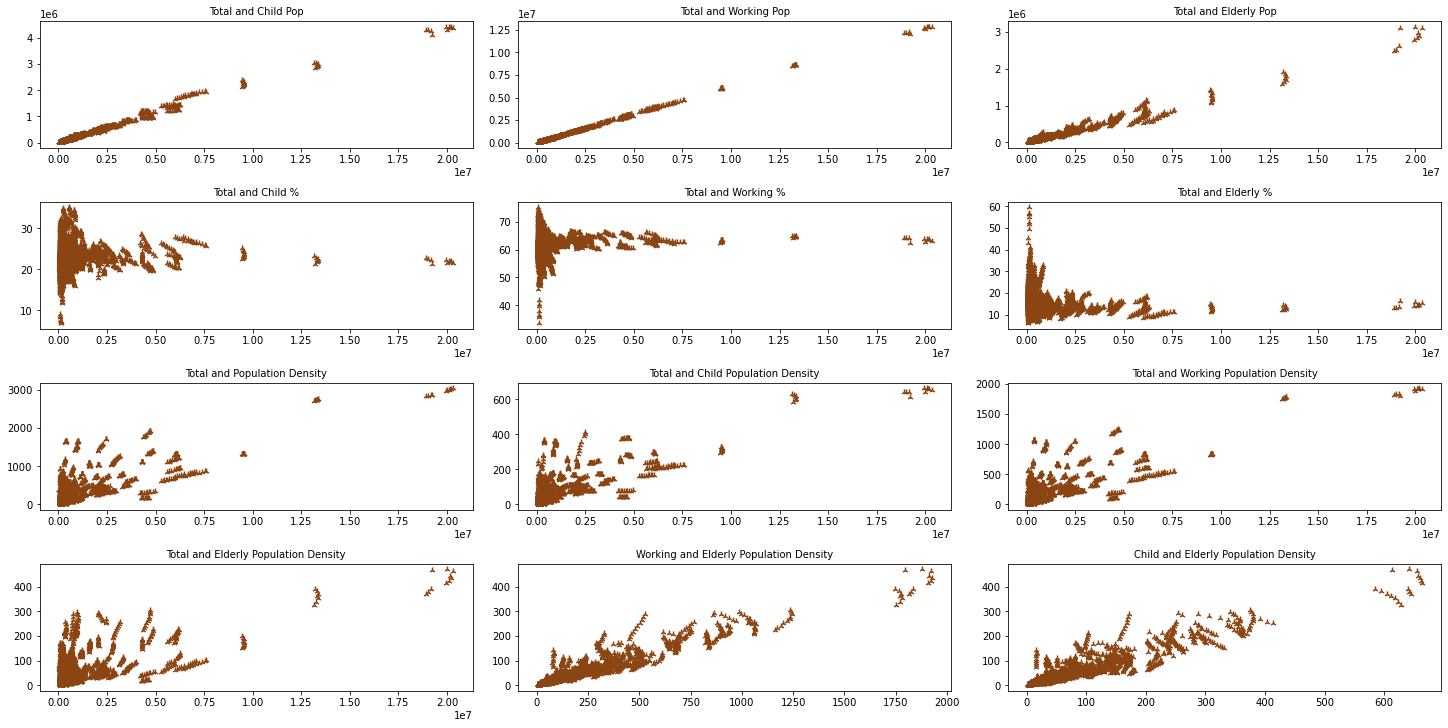

In [66]:
fig, axs = plt.subplots(4, 3, figsize=(20,10))
axs[0,0].scatter(data['total'], data['child'], color='saddlebrown', marker = '2')
axs[0, 0].set_title("Total and Child Pop", fontsize = 9, font = 'helvetica')
axs[0,1].scatter(data['total'], data['taxbase'], color='saddlebrown', marker = '2')
axs[0, 1].set_title("Total and Working Pop", fontsize = 9, font = 'helvetica')
axs[0,2].scatter(data['total'], data['O65'], color='saddlebrown', marker = '2')
axs[0, 2].set_title("Total and Elderly Pop", fontsize = 9, font = 'helvetica')
axs[1,0].scatter(data['total'], data['Pchild'], color='saddlebrown', marker = '2')
axs[1, 0].set_title("Total and Child %", fontsize = 9, font = 'helvetica')
axs[1,1].scatter(data['total'], data['Ptaxbase'], color='saddlebrown', marker = '2')
axs[1, 1].set_title("Total and Working %", fontsize = 9, font = 'helvetica')
axs[1,2].scatter(data['total'], data['PO65'], color='saddlebrown', marker = '2')
axs[1, 2].set_title("Total and Elderly %", fontsize = 9, font = 'helvetica')
axs[2,0].scatter(data['total'], data['popdensity'], color='saddlebrown', marker = '2')
axs[2, 0].set_title("Total and Population Density", fontsize = 9, font = 'helvetica')
axs[2,1].scatter(data['total'], data['childpopdensity'], color='saddlebrown', marker = '2')
axs[2, 1].set_title("Total and Child Population Density", fontsize = 9, font = 'helvetica')
axs[2,2].scatter(data['total'], data['tbpopdensity'], color='saddlebrown', marker = '2')
axs[2, 2].set_title("Total and Working Population Density", fontsize = 9, font = 'helvetica')
axs[3,0].scatter(data['total'], data['O65popdensity'], color='saddlebrown', marker = '2')
axs[3, 0].set_title("Total and Elderly Population Density", fontsize = 9, font = 'helvetica')
axs[3,1].scatter(data['tbpopdensity'], data['O65popdensity'], color='saddlebrown', marker = '2')
axs[3, 1].set_title("Working and Elderly Population Density", fontsize = 9, font = 'helvetica')
axs[3,2].scatter(data['childpopdensity'], data['O65popdensity'], color='saddlebrown', marker = '2')
axs[3, 2].set_title("Child and Elderly Population Density", fontsize = 9, font = 'helvetica')
axs[3,2].scatter(data['childpopdensity'], data['O65popdensity'], color='saddlebrown', marker = '2')
axs[3, 2].set_title("Child and Elderly Population Density", fontsize = 9, font = 'helvetica')
# fig.constrained_layout()

I think the question is... do we want to assume some level of growth with something (i.e. population) and see our peers off of that - 5, 10 years..., or do we want to impose another set of conditions for near term effects and find peers that way? Both? ahh.
